In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check current working directory
print("Current working directory:", os.getcwd())

# Load dataset from the correct path
# Update the path below if necessary
csv_path = 'Data/Raw/stores_sales_forecasting.csv'
if not os.path.exists(csv_path):
	print(f"File not found: {csv_path}")
else:
	df = pd.read_csv(csv_path, encoding='latin1')

Current working directory: /Users/huzaifamahmood/Desktop/projects/Level 2/Sales Forecasting with Time-Series Analysis


In [5]:
# Display the first 5 rows to see the structure
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
# Get a concise summary of the DataFrame
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null  

In [7]:
# Check for any missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
# --- Data Type Conversion ---
# Convert 'Order Date' from object to datetime, handling mixed formats
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

# Set 'Order Date' as the index of the DataFrame
# This is a crucial step for time-series analysis in pandas
df.set_index('Order Date', inplace=True)

# Sort the index to make sure the dates are in chronological order
df.sort_index(inplace=True)

print("Converted 'Order Date' to datetime and set as index.")
display(df.head())

Converted 'Order Date' to datetime and set as index.


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7949,CA-2014-131009,3/5/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.3,0.0000
2014-01-03,7950,CA-2014-131009,3/5/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536
2014-01-03,8311,CA-2014-168312,3/7/2014,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,Texas,77036,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.3,-43.0296
2014-01-03,6548,CA-2014-113880,3/5/2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172
2014-01-03,158,CA-2014-104269,3/6/2014,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.2,51.4764


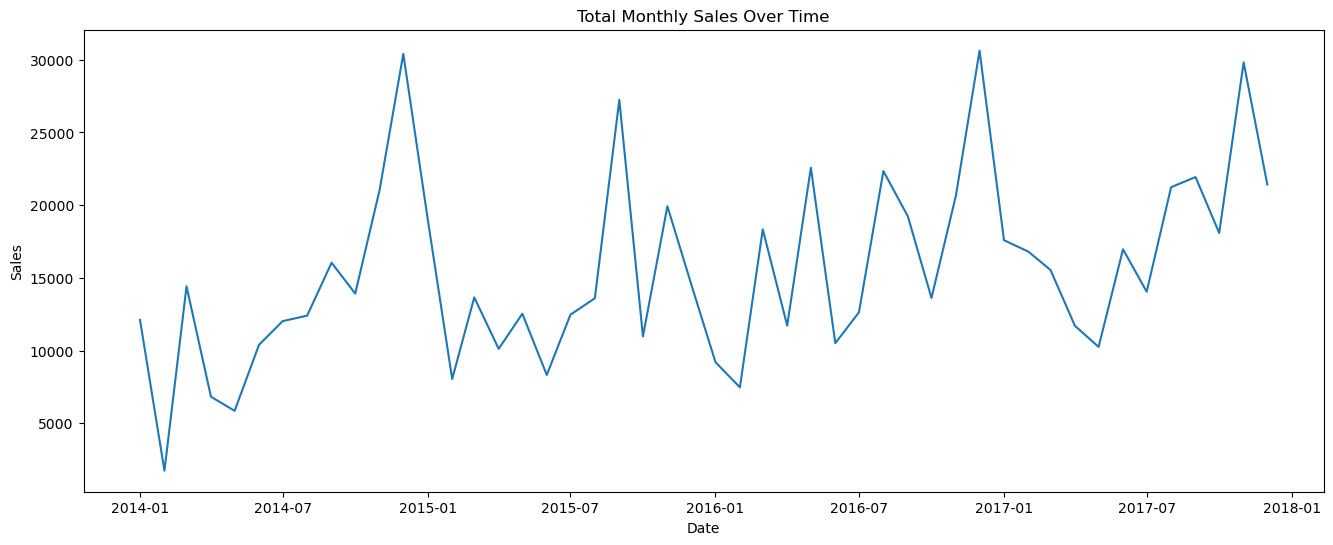

In [11]:
# Resample the sales data to a monthly frequency, summing up the sales for each month.
# 'MS' stands for 'Month Start'.
monthly_sales = df['Sales'].resample('MS').sum()

# Plot the monthly sales data
plt.figure(figsize=(16, 6))
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(monthly_sales)
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_9721/431959124.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month Name', y='Sales', data=df, order=[


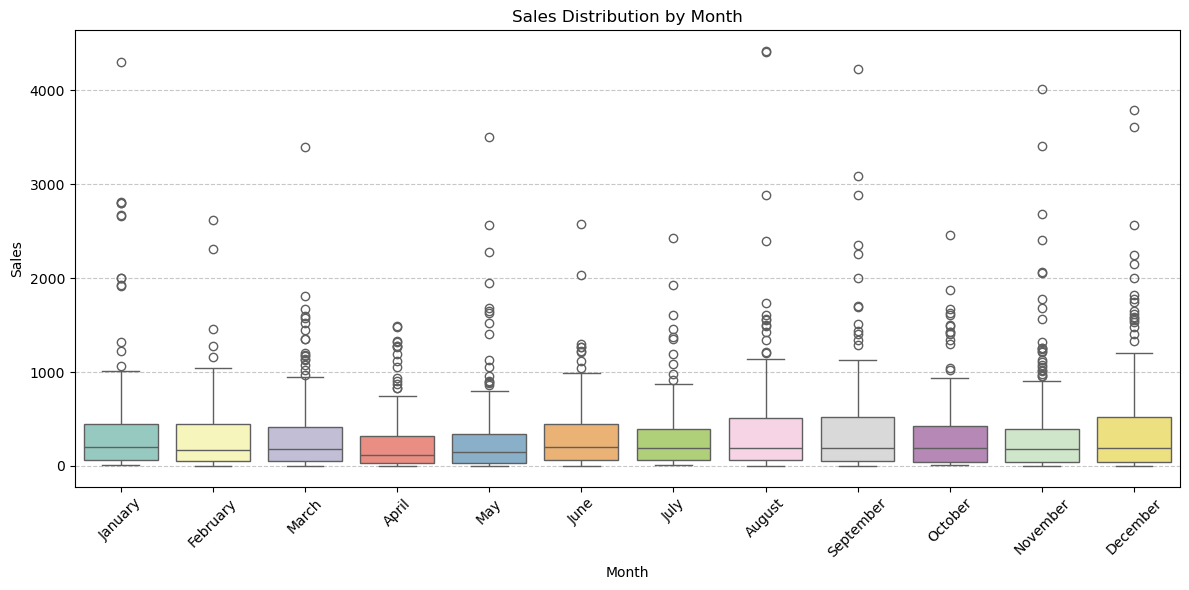

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_9721/431959124.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Sales', data=df, order=[


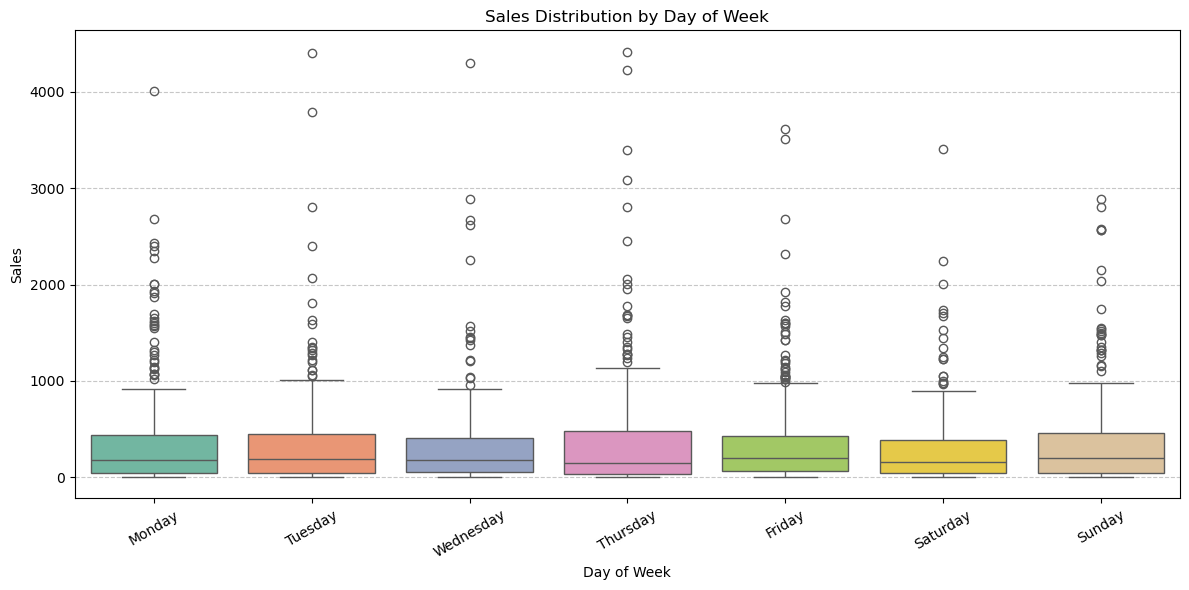

In [13]:
# Create new columns for month and day of the week for easier aggregation
df['Month'] = df.index.month
df['Month Name'] = df.index.month_name()
df['Day of Week'] = df.index.day_name()

# --- Monthly Sales Analysis ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month Name', y='Sales', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], palette='Set3')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Day of Week Sales Analysis ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Sales', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='Set2')
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

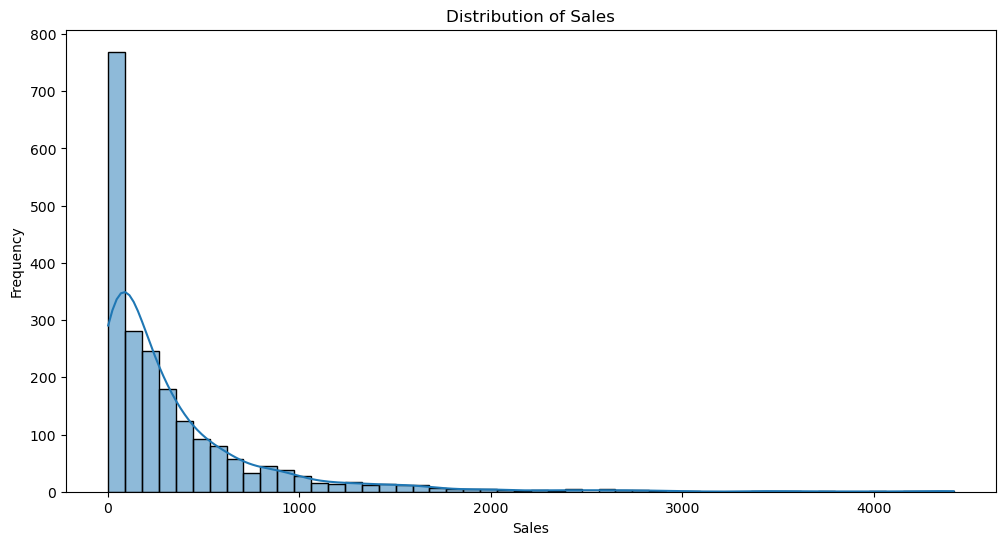

In [16]:
# Plot a histogram and a density plot for the 'Sales' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

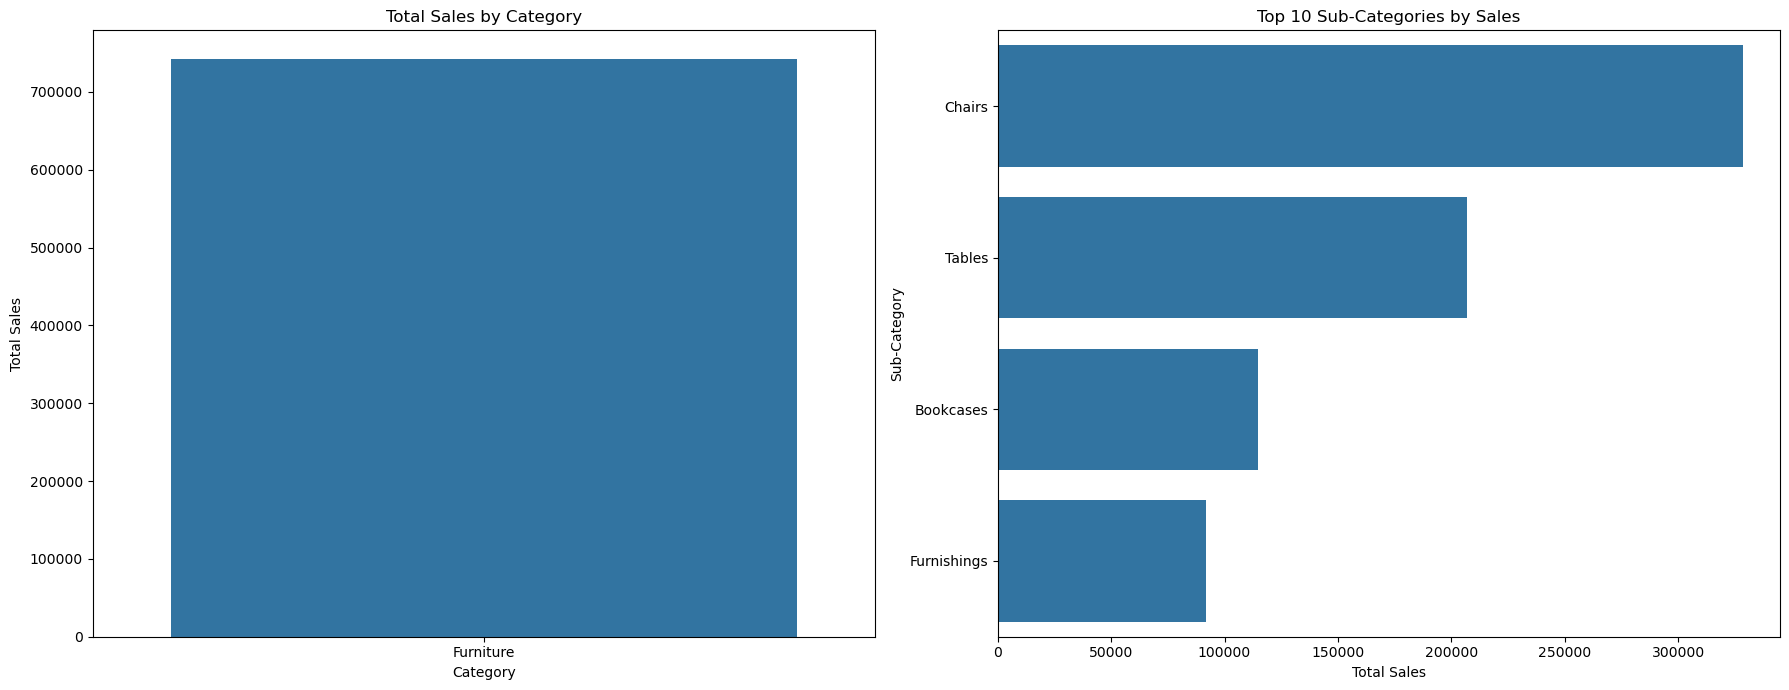

In [18]:
# Group by Category and sum the sales, then sort
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Group by Sub-Category and sum the sales, then take the top 10
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot for Category Sales
sns.barplot(x=category_sales.index, y=category_sales.values, ax=axes[0])
axes[0].set_title('Total Sales by Category')
axes[0].set_ylabel('Total Sales')

# Plot for Sub-Category Sales
sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, ax=axes[1], orient='h')
axes[1].set_title('Top 10 Sub-Categories by Sales')
axes[1].set_xlabel('Total Sales')

plt.tight_layout()
plt.show()

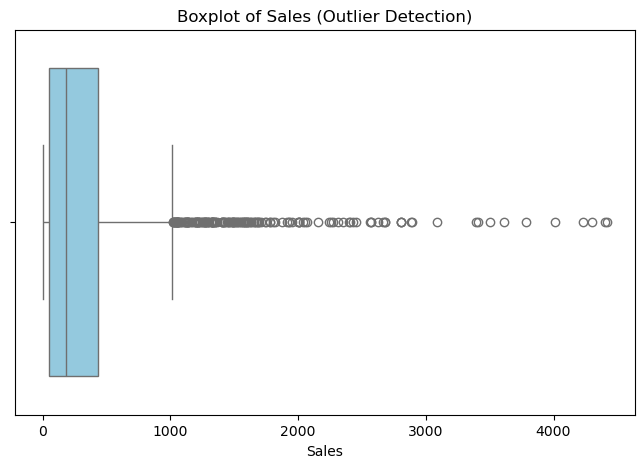

In [19]:
# Outlier Detection
# Boxplot to visually inspect outliers in the Sales column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title('Boxplot of Sales (Outlier Detection)')
plt.xlabel('Sales')
plt.show()

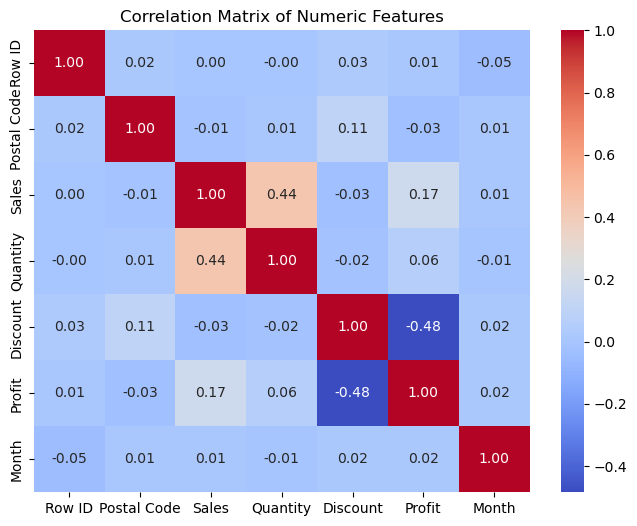

In [20]:
# Correlation Analysis
# Compute and plot the correlation matrix for numeric columns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

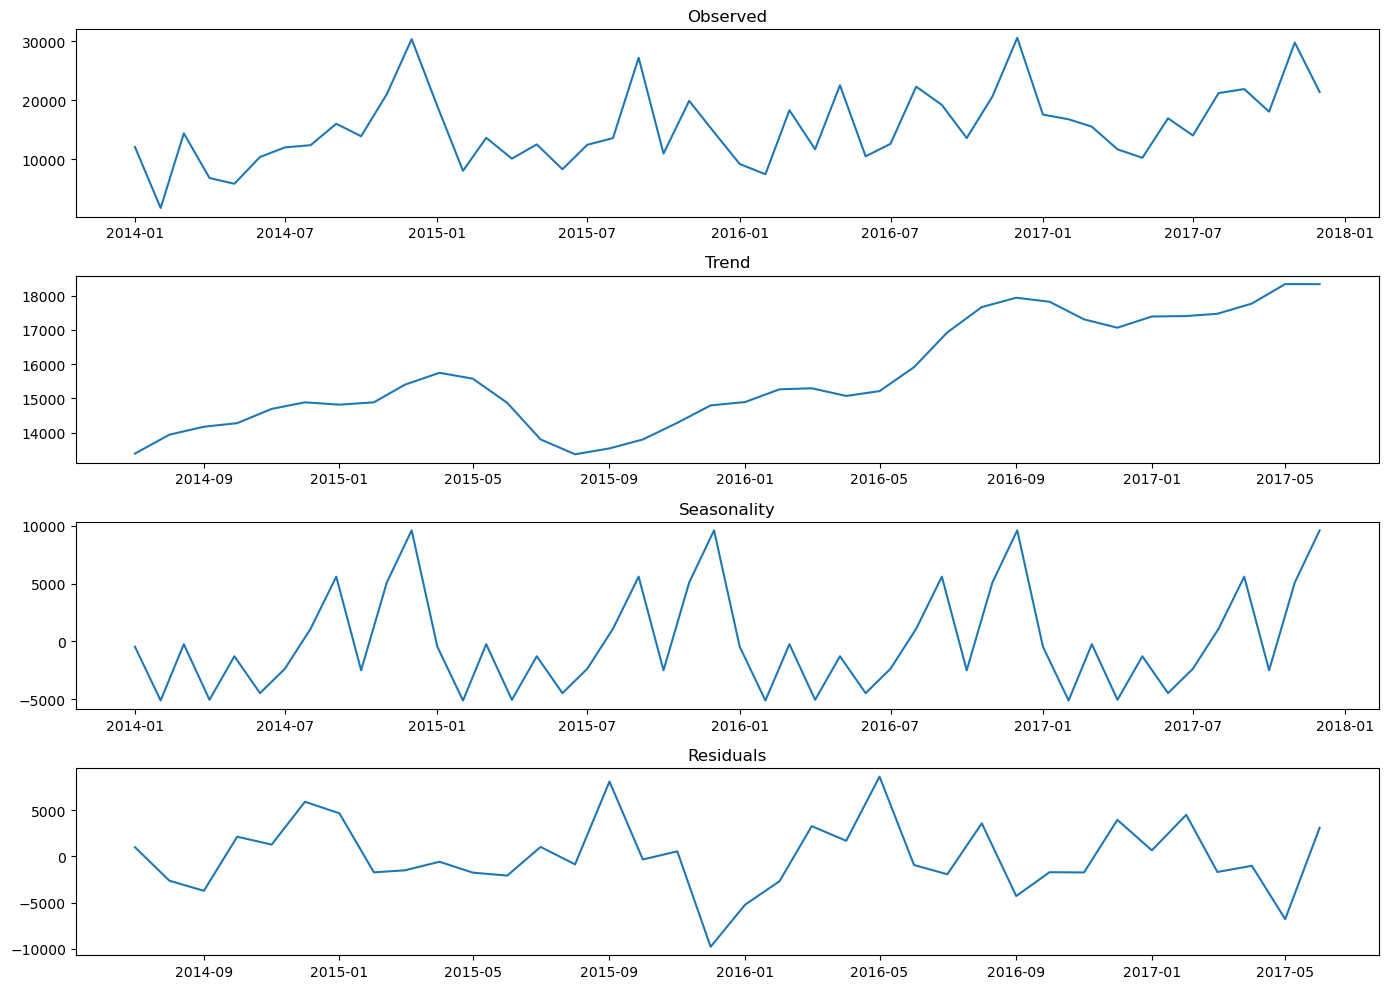

In [21]:
# Trend and Seasonality Decomposition
# Decompose monthly sales to visualize trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure monthly_sales has a DatetimeIndex and no missing values
monthly_sales = df['Sales'].resample('MS').sum().dropna()
decomposition = seasonal_decompose(monthly_sales, model='additive')

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

/var/folders/sy/vptgh1ln55ggff5yxg_t7tmm0000gn/T/ipykernel_9721/957336291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


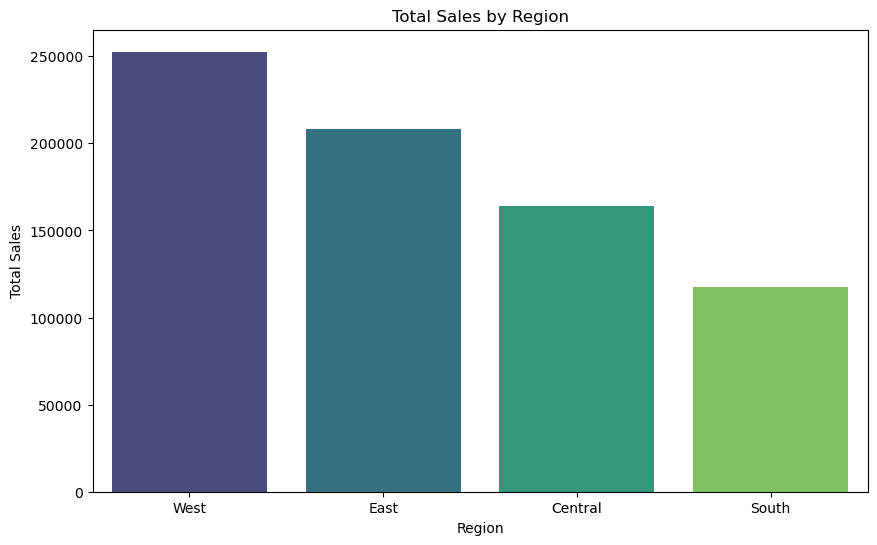

In [23]:
# Additional Groupings (e.g., by Region if available)
# If 'Region' column exists, plot total sales by region
if 'Region' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.show()